In [21]:
from blocks.extensions.saveload import load
import numpy
import theano
from theano import tensor
from fuel.streams import ServerDataStream
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
from models.b4x3DCNN import get_model

In [23]:
input_var  = tensor.tensor4('image_features')
target_var = tensor.tensor4('image_targets')
multiply_var = tensor.matrix('multiplier')
multiply_var = tensor.addbroadcast(multiply_var, 1)

In [24]:
test_prediction, prediction, loss, params = get_model(input_var, target_var, multiply_var)

In [25]:
params_test = numpy.load('train_sav')

In [26]:
for p, value in zip(params, params_test.items()):
    
    p.set_value(value[1])

In [27]:
f = theano.function([input_var], test_prediction)

In [28]:
valid_stream = ServerDataStream(('cases', 'image_features', 'image_targets', 'multiplier'), False, hwm=10, port=5558)

In [30]:
ei = valid_stream.get_epoch_iterator()
d = next(ei)

In [31]:
out = f(d[1])

In [ ]:
print d[2][0].shape

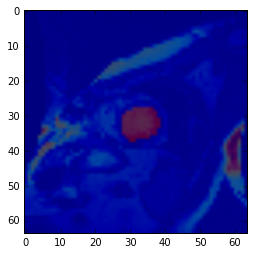

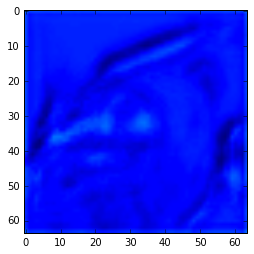

0.222217 0.416647


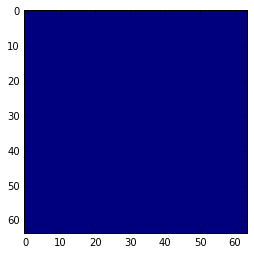

In [38]:
i = 1
frame = 10
plt.imshow(d[1][i,frame,:,:])
plt.imshow(d[2][i,frame,:,:], alpha=0.7)
plt.show()

plt.imshow(out[i,0,frame,:,:], vmax=1)
#plt.imshow(d[2][i,frame,:,:], alpha=0.7)
plt.show()

print out[i,0,frame,:,:].min(), out[i,0,frame,:,:].max()
plt.imshow(out[i,0,frame,:,:]>0.5)

In [ ]:
params_test.keys()